## Section 1: Introduction

In this project, we focus on detecting credit card fraud using various machine learning classifiers. The goal is to build models that accurately classify transactions as fraudulent or legitimate while maximizing key metrics like precision and recall. We experimented with `RandomForest`, aiming to optimize the F1-score for fraud detection.


&nbsp;

## Section 2: Understanding the Data

The dataset used in this project contains anonymized credit card transaction data. It has `30` features, including `V1` through `V28` representing the result of a PCA transformation. Two additional features are `Amount` and `Time`. The target variable is `Class`, where `1` indicates fraud and `0` indicates non-fraud.

Due to the significant class imbalance, with fraud representing less than `0.2%` of the transactions, this presents challenges that require special handling, particularly in model evaluation.


#### Step 2.1: Import the necessary libraries

The following libraries are used for data analysis, visualization, and machine learning:
- `pandas` and `numpy` for data manipulation and numerical operations.
- `matplotlib` and `seaborn` for data visualization.
- `RandomForestClassifier` from `sklearn.ensemble` for machine learning classification.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

#### Step 2.2:  Load the dataset

The dataset used here is from the Kaggle Credit Card Fraud Detection challenge. The dataset contains anonymized features (`V1` to `V28`), `Time`, `Amount`, and a `Class` column. 
- `Class = 1` indicates a fraudulent transaction.
- `Class = 0` indicates a non-fraudulent transaction.

We load the data into a pandas DataFrame for analysis.


In [2]:
# The dataset is from Kaggle Credit Card Fraud Dataset. Please download it from: https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('.\data\creditcard.csv')

#### Step 2.3: Dataset dimensions

The `.shape` function will return the dimensions of the dataset in terms of rows and columns.
- Rows represent individual transactions.
- Columns represent the features, including `Class`, which indicates if the transaction is fraudulent.


In [3]:
# summary of the data set
df.shape

(284807, 31)

#### Step 2.4: Preview the dataset

We use `.head()` to display the first five rows of the dataset, which gives us an overview of the features and the structure of the data.


In [4]:
# peek the first a few data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Step 2.5: Count and percentage of fraudulent and non-fraudulent transactions

This step helps us understand the class distribution:
- We count the number of occurrences of `Class = 0` (non-fraudulent) and `Class = 1` (fraudulent) transactions.
- Additionally, we calculate the percentage of fraudulent transactions to understand the class imbalance.
Class imbalance can affect model performance, and it is crucial to account for it when developing machine learning models.


In [5]:
# Count the number of occurrences for each class (0 = non-fraud, 1 = fraud)
class_counts = df['Class'].value_counts()

# Print the counts for non-fraudulent (Class = 0) and fraudulent (Class = 1) transactions
print(class_counts)

# Separate the counts if needed
count_non_fraud = class_counts[0]  # Count of non-fraudulent transactions (Class = 0)
count_fraud = class_counts[1]      # Count of fraudulent transactions (Class = 1)

print(f"Non-Fraudulent Transactions (0): {count_non_fraud}")
print(f"Fraudulent Transactions (1): {count_fraud}")

# Calculate and print the percentage of fraudulent transactions
percentage_fraud = (count_fraud / len(df)) * 100
print(f"Percentage of Fraudulent Transactions: {percentage_fraud:.4f}%")

0    284315
1       492
Name: Class, dtype: int64
Non-Fraudulent Transactions (0): 284315
Fraudulent Transactions (1): 492
Percentage of Fraudulent Transactions: 0.1727%


#### Step 2.6 Check for missing values

In this step, we check whether the dataset contains any missing values. Missing values can impact the performance of machine learning models and may need to be handled by either removing or imputing them. 
- The `.isnull().sum()` function helps us identify the number of missing values in each column.


In [6]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### Step 2.7 Display the Min and Max values for each column

In this step, we loop through all the columns of the dataset to check the minimum and maximum values for each feature.
- Understanding the range of values for each column helps assess whether scaling is needed during preprocessing.
- This information is especially useful for models like logistic regression, neural networks, and support vector machines, where scaling can impact performance.

By checking the `min()` and `max()` values of each column, we can identify potential outliers or abnormalities in the data.


In [7]:
# Display the min and max values for each column
for column in df.columns:
    print(f"Column: {column}, Min: {df[column].min()}, Max: {df[column].max()}")

Column: Time, Min: 0.0, Max: 172792.0
Column: V1, Min: -56.407509631329, Max: 2.45492999121121
Column: V2, Min: -72.7157275629303, Max: 22.0577289904909
Column: V3, Min: -48.3255893623954, Max: 9.38255843282114
Column: V4, Min: -5.68317119816995, Max: 16.8753440335975
Column: V5, Min: -113.743306711146, Max: 34.8016658766686
Column: V6, Min: -26.1605059358433, Max: 73.3016255459646
Column: V7, Min: -43.5572415712451, Max: 120.589493945238
Column: V8, Min: -73.2167184552674, Max: 20.0072083651213
Column: V9, Min: -13.4340663182301, Max: 15.5949946071278
Column: V10, Min: -24.5882624372475, Max: 23.7451361206545
Column: V11, Min: -4.79747346479757, Max: 12.0189131816199
Column: V12, Min: -18.6837146333443, Max: 7.8483920756446
Column: V13, Min: -5.79188120632084, Max: 7.12688295859376
Column: V14, Min: -19.2143254902614, Max: 10.5267660517847
Column: V15, Min: -4.49894467676621, Max: 8.87774159774277
Column: V16, Min: -14.1298545174931, Max: 17.3151115176278
Column: V17, Min: -25.1627993

##### Summary of Min and Max Values for Each Feature

The results from the above cell provide a quick overview of the minimum and maximum values for each feature in the dataset. Here are the key points:

- **Time**: Ranges from 0 to 172,792, indicating that transactions span a significant time period. The 'Time' column represents the seconds elapsed between each transaction and the first transaction in the dataset.
  
- **V1 to V28**: These columns are the principal components derived from a PCA (Principal Component Analysis) transformation, and they have varying ranges:
  - Some columns like **V2**, **V5**, **V7**, **V20**, and **V28** have quite large negative and positive ranges, indicating strong variation in these principal components.
  - Others like **V24**, **V26**, and **V13** have smaller ranges, indicating less variability.
  
- **Amount**: Represents the transaction amounts, ranging from $0 to $25,691.16. This confirms the wide range of transaction amounts in the dataset.
  
- **Class**: This is the target variable, where `0` represents non-fraudulent transactions, and `1` represents fraudulent ones. The minimum value is 0, and the maximum is 1, confirming the binary classification nature of this problem.

##### Key Observations:
- The dataset appears to be preprocessed and transformed, especially with the PCA-derived components (**V1-V28**).
- There is significant variation in the range of values across the different columns.
- Some of the principal components (e.g., **V5**, **V7**, **V20**) have wide ranges, which could be indicative of their importance in distinguishing between fraudulent and non-fraudulent transactions.


#### Step 2.8 Exploratory Data Analysis: Statistical Summary

We will begin our exploratory data analysis by generating a statistical summary of the dataset. This includes details such as the count, mean, standard deviation, and percentiles for each feature in the dataset.

The `df.describe()` method helps us get a sense of the central tendency, spread, and shape of the dataset's distribution, which will guide us in identifying potential areas for further analysis, including outliers.


In [8]:
# Exploratory Data Analysis
# This will give a statistical summary of the dataset, including count, mean, standard deviation, min, max, and quantiles for numerical columns.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Step 2.9 Visualizing Data Distributions: Histograms

Next, we visualize the distributions of the dataset's features using histograms. This allows us to explore the frequency of values for each feature and identify any patterns, skewness, or potential outliers.

Each feature is plotted on an individual histogram, and we can visually inspect how the data is distributed across different ranges.



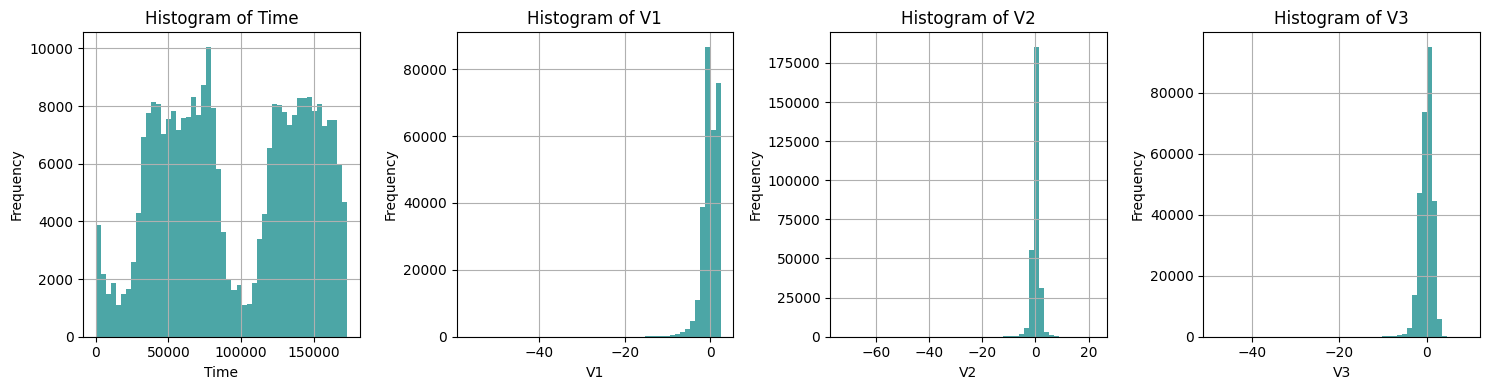

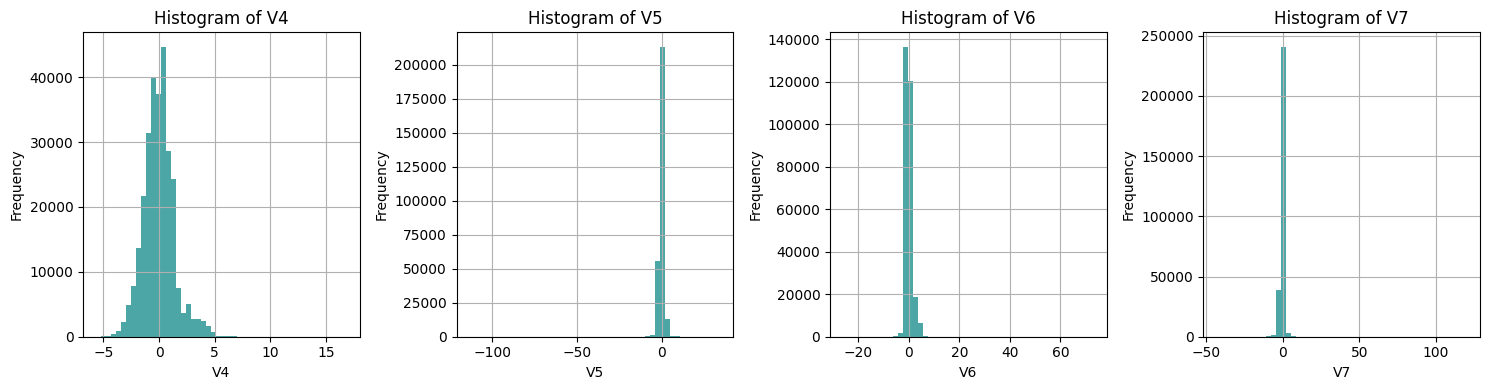

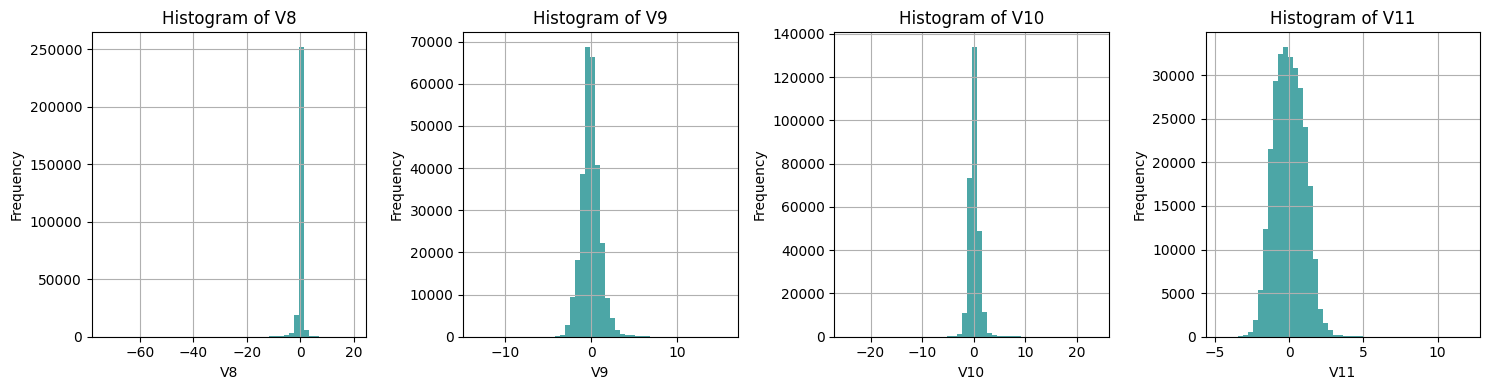

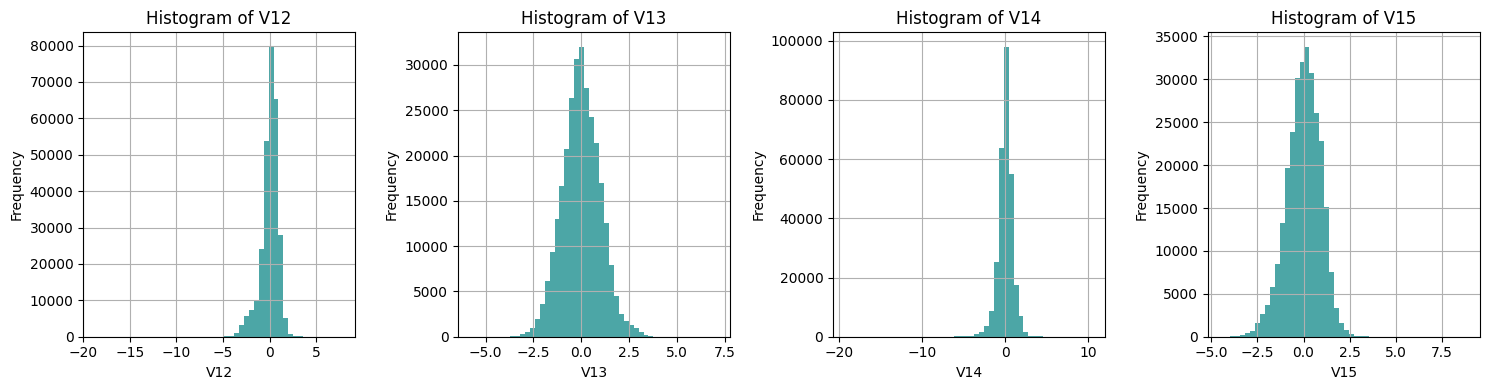

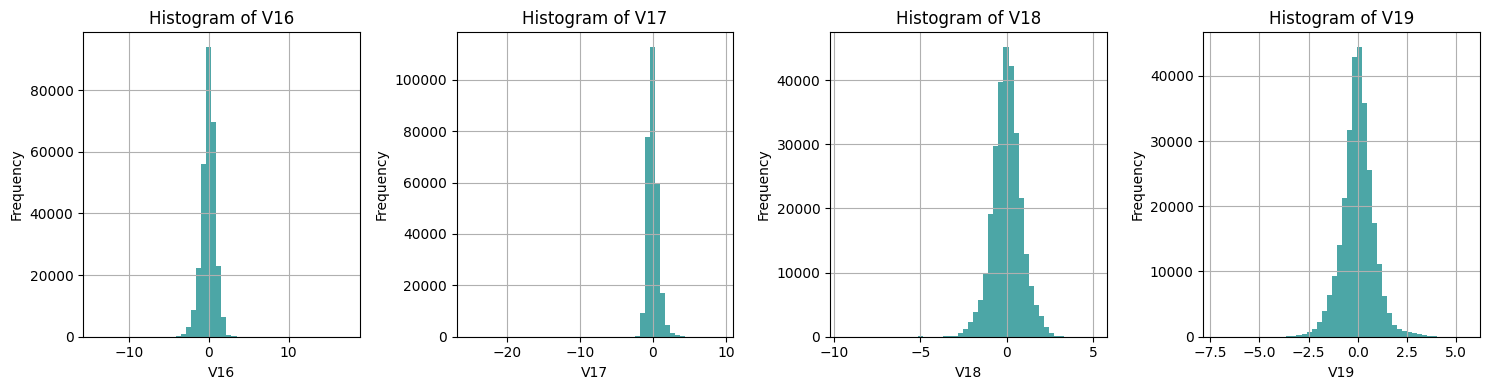

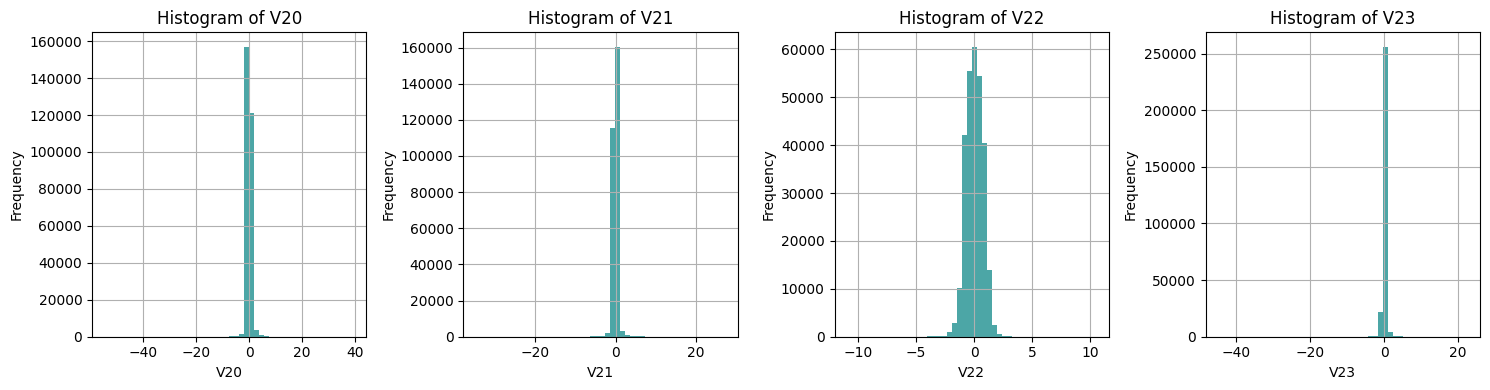

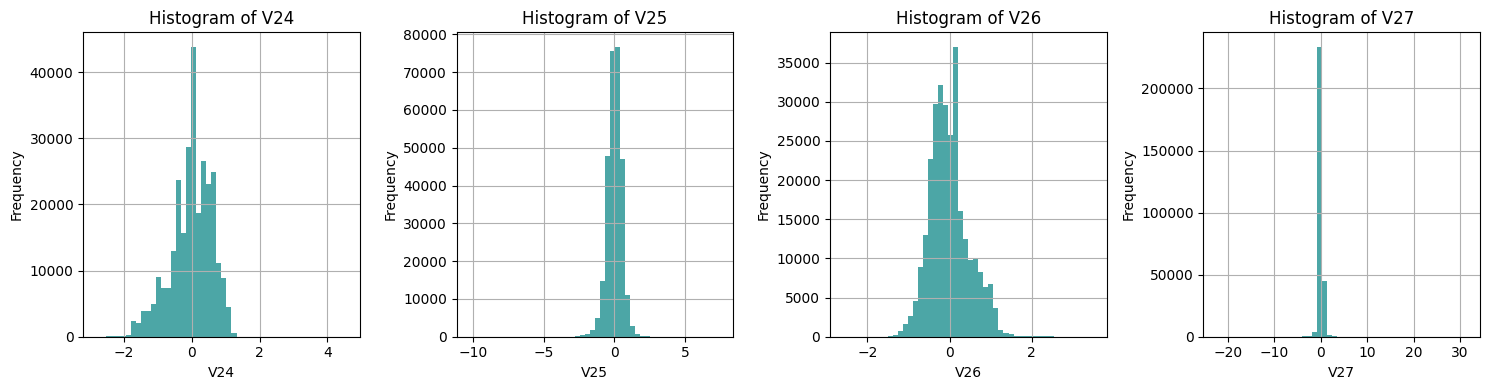

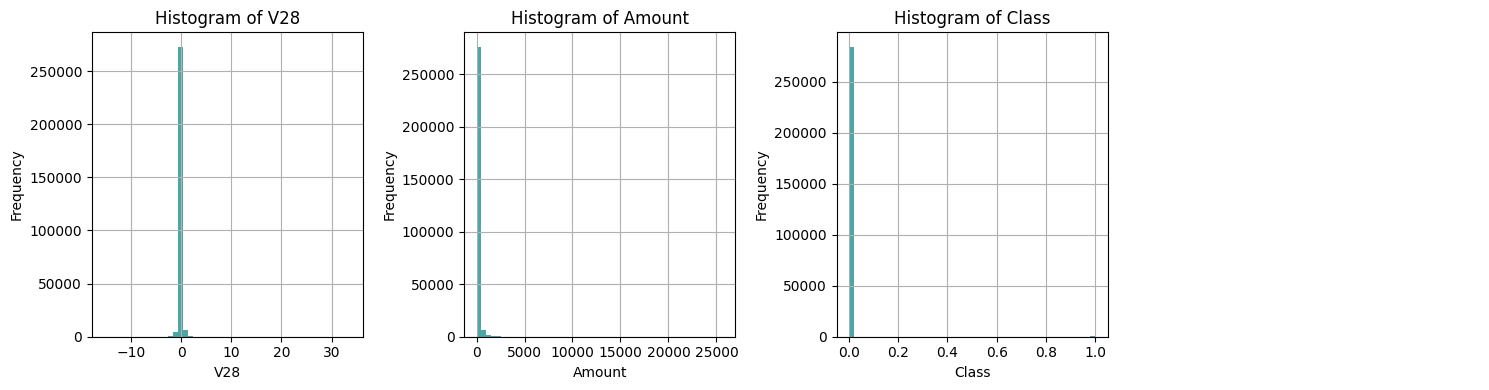

In [9]:
# View histogram data
# Get the list of columns
columns = df.columns

# Loop through the columns in groups of 4
for i in range(0, len(columns), 4):
    # Create a subplot with 1 row and 4 columns, each with an independent y-axis
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the first four columns in the group
    for j in range(4):
        if i + j < len(columns):
            axes[j].hist(df[columns[i + j]], bins=50, color='teal', alpha=0.7)
            axes[j].set_title(f"Histogram of {columns[i + j]}")
            axes[j].set_xlabel(columns[i + j])
            axes[j].set_ylabel("Frequency")
            axes[j].grid(True)
        else:
            # If there is no column for this plot, hide the subplot
            axes[j].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()
    plt.close()  # Close the plot to free up memory


##### Review of Histogram Plots

The histogram plots provide an important visual summary of the distribution of the features in the dataset. Upon reviewing the plots, we observe the following:

- Most of the features, particularly those labeled V1 to V28, represent principal components derived from the original data and appear to be centered around zero, exhibiting various distributions.
- **V2, V5, V6, V7, V8, V20, V21, V23, V27, V28, "Amount", and "Class"** are notable for not being normally distributed, displaying skewness or irregular patterns. This suggests the possibility of outliers or inherent characteristics of the transactions in these features.
- The **"Class"** feature, which represents fraud or non-fraud transactions, is highly imbalanced, as expected.
- The **"Amount"** feature shows a right-skewed distribution, indicating that most transactions involve small amounts, with a few larger transactions.

These irregularities or skewness in the data could indicate potential outliers or structural differences in transaction behavior. In the next steps, we will need to further analyze outliers and potentially apply transformations or scaling to make the data more suitable for machine learning algorithms.


#### Step 2.10 Detecting Outliers Using the IQR Method

Outliers are data points that deviate significantly from other observations in the dataset. Identifying outliers is crucial because they can potentially distort the results of machine learning algorithms. One common method to detect outliers is the **Interquartile Range (IQR) method**.

##### Interquartile Range (IQR)
The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles (Q3 and Q1, respectively):

IQR = Q3 - Q1

Using the IQR, we define outliers as points that fall below the lower bound or above the upper bound:
- **Lower Bound**: Q1 - 1.5 * IQR
- **Upper Bound**: Q3 + 1.5 * IQR

##### Process:
1. **Q1 (25th percentile)** and **Q3 (75th percentile)** are calculated for each numeric feature.
2. **Lower Bound**: Any value below Q1 - 1.5 * IQR is considered an outlier.
3. **Upper Bound**: Any value above Q3 + 1.5 * IQR is considered an outlier.
4. We count the number of outliers for each feature and calculate the percentage of outliers relative to the total number of records in the dataset.
5. The features are sorted based on the percentage of outliers in descending order to identify the features with the highest proportion of outliers.

Features with a high percentage of outliers may require further analysis, and in some cases, we may consider transformations, scaling, or removing the outliers.

##### Results:
The table below shows the number and percentage of outliers for each feature in the dataset:


In [10]:
# Dictionary to store outlier information
outlier_info = {}

# Detecting outliers using IQR method for numerical features
numeric_columns = df.select_dtypes(include=[np.number]).columns
total_rows = len(df)

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / total_rows) * 100
    
    # Store the number of outliers and percentage in the dictionary
    outlier_info[column] = {
        "num_outliers": num_outliers,
        "percentage_outliers": percentage_outliers
    }

# Sort the dictionary by the percentage of outliers in descending order
sorted_outliers = sorted(outlier_info.items(), key=lambda x: x[1]['percentage_outliers'], reverse=True)

# Display the results
print(f"{'Feature':<20} {'Num Outliers':<15} {'% Outliers':<15}")
print("=" * 50)
for feature, info in sorted_outliers:
    print(f"{feature:<20} {info['num_outliers']:<15} {info['percentage_outliers']:<15.2f}")


Feature              Num Outliers    % Outliers     
V27                  39163           13.75          
Amount               31904           11.20          
V28                  30342           10.65          
V20                  27770           9.75           
V8                   24134           8.47           
V6                   22965           8.06           
V23                  18541           6.51           
V12                  15348           5.39           
V21                  14497           5.09           
V14                  14149           4.97           
V2                   13526           4.75           
V5                   12295           4.32           
V4                   11148           3.91           
V19                  10205           3.58           
V10                  9496            3.33           
V7                   8948            3.14           
V9                   8283            2.91           
V16                  8184            2.87     

#### Step 2.11 Correlation of Outliers with Fraud Cases

After identifying the presence of outliers in various features, it's important to investigate whether these outliers are associated with fraudulent transactions. Outliers may provide significant information as fraudulent transactions can deviate significantly from normal patterns.

To explore this, we can calculate the percentage of fraud cases among the detected outliers in each feature. By doing this, we aim to understand if outliers in certain features are more strongly associated with fraud compared to non-outliers.

##### Key Insights:
- Features with a higher percentage of fraud cases among their outliers may indicate that these features play a critical role in detecting fraud.
- If a feature has a high correlation between its outliers and fraud cases, it suggests that this feature could be crucial in identifying potential fraudulent transactions.
- Conversely, features with a low percentage of fraud cases among outliers may indicate that their outliers do not contribute significantly to fraud detection, and we might consider treating or removing such outliers to improve model performance.

The next steps would involve handling these outliers through techniques such as:
1. **Removing Outliers**: Discarding the detected outliers, especially in features where outliers have a low correlation with fraud.
2. **Transforming Features**: Applying techniques like log transformation or scaling to reduce the impact of outliers while preserving valuable information.
3. **Keeping Outliers**: In cases where the outliers are strongly associated with fraud, we might retain these outliers as they could be essential for model accuracy in fraud detection.


In [11]:
# Check for the correlation of outliers with fraud cases for each feature
outlier_fraud_correlation = []

# Loop through each feature
for column in df.columns[:-1]:  # Exclude the 'Class' column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get outliers for the current column
    is_outlier = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Check how many fraud cases are in the outliers
    fraud_cases_in_outliers = df[is_outlier & (df['Class'] == 1)]
    non_fraud_cases_in_outliers = df[is_outlier & (df['Class'] == 0)]

    # Calculate the percentage of fraud cases among outliers
    total_outliers = len(df[is_outlier])
    fraud_percentage_in_outliers = (len(fraud_cases_in_outliers) / total_outliers) * 100 if total_outliers > 0 else 0

    # Append the result to the list
    outlier_fraud_correlation.append({
        'Feature': column,
        'Fraud Cases in Outliers': len(fraud_cases_in_outliers),
        'Non-Fraud Cases in Outliers': len(non_fraud_cases_in_outliers),
        'Total Outliers': total_outliers,
        'Percentage Fraud in Outliers': fraud_percentage_in_outliers
    })

# Convert to DataFrame to display the results
outlier_fraud_df = pd.DataFrame(outlier_fraud_correlation)
outlier_fraud_df = outlier_fraud_df.sort_values(by='Percentage Fraud in Outliers', ascending=False)

# Display the result
print(outlier_fraud_df)


   Feature  Fraud Cases in Outliers  Non-Fraud Cases in Outliers  \
11     V11                      294                          486   
3       V3                      312                         3051   
17     V17                      397                         7023   
16     V16                      351                         7833   
10     V10                      399                         9097   
7       V7                      301                         8647   
18     V18                      237                         7296   
14     V14                      430                        13719   
4       V4                      318                        10830   
9       V9                      223                         8060   
12     V12                      409                        14939   
1       V1                      174                         6888   
22     V22                       28                         1289   
2       V2                      246             

##### Key Observations Based on Outlier and Fraud Correlation:

1. **Class Feature**:
   - The `Class` feature itself has 492 fraud cases, which aligns with the total number of fraud cases in the dataset (100% of fraud cases are in this "outlier" feature, which makes sense because this feature directly indicates fraud or non-fraud transactions).

2. **Top Features with Higher Fraud Outliers**:
   - **V11** shows the highest percentage of fraud cases among its outliers (37.69%), indicating that it might be a critical feature for fraud detection.
   - Features such as **V3**, **V17**, **V16**, and **V10** also show noticeable percentages of fraud cases in their outliers, suggesting that outliers in these features could be indicative of fraudulent behavior.

3. **Features with Lower Fraud Outliers**:
   - Many features (e.g., **Amount**, **V28**, **V27**) have large numbers of outliers, but the percentage of fraud cases among these outliers is quite low. For example, **Amount** has 31,904 outliers, but only 0.28% of these outliers are associated with fraud cases.
   - Similarly, **V27** and **V28** have a large number of outliers, but a low percentage of fraud cases (less than 1%).

4. **Features with No or Very Few Outliers**:
   - Some features, such as **Time** and **V24**, have no or very few outliers and no correlation with fraud cases.

##### Insights and Next Steps:
- **High Fraud Outliers (e.g., V11, V3, V17)**: These features may contain strong signals related to fraud detection, particularly among their outliers. It could be beneficial to further investigate the behavior of these features (e.g., distribution analysis, transformation, scaling).
  
- **Low Fraud Outliers (e.g., Amount, V28, V27)**: Even though these features have a large number of outliers, their correlation with fraud is low. These features may benefit from different preprocessing techniques such as scaling, transformation, or even removal of outliers.

- **Features with Very Few or No Outliers**: For features with very few outliers or none (such as **Time** and **V24**), it’s likely that no further outlier handling is necessary.

- **Handling Outliers**: Features with high fraud correlation in their outliers (such as **V11** or **V3**) could be explored further, possibly retaining their outliers for model training. On the other hand, features with low fraud correlation might have their outliers removed.

##### Conclusion:
This analysis provides valuable insights into the correlation between outliers and fraud cases. Based on these insights, we can make informed decisions on how to handle outliers for the next steps in data preprocessing, including normalization, scaling, or outlier removal, to improve the performance of machine learning models.


&nbsp;

## Section 3: Preprocessing the Data

#### Step 3.1 Preprocessing the Data

#### Purpose
The preprocessing step is crucial for preparing the data before training the model. Given the highly imbalanced nature of the dataset, special attention is needed to handle the skew between non-fraud and fraud transactions. Instead of oversampling using methods like SMOTE, we have opted for downsampling the majority class (non-fraud) to achieve a 10:1 ratio of non-fraud to fraud cases. Additionally, feature engineering and scaling are applied to improve model performance.

#### Methods

1. **Log Transformation of the `Amount` Feature:**
   - The `Amount` feature represents the transaction amount, which varies widely across transactions. To reduce the impact of outliers and skewed distributions, we apply a log transformation to the `Amount` feature. This helps normalize its distribution and stabilize variance.

2. **Feature Extraction - `Hour` Feature:**
   - The dataset contains a `Time` feature that records the time elapsed since the first transaction in the dataset. We extract the `Hour` component from the `Time` feature to capture potential hourly patterns in fraud activity.

3. **Downsampling to Handle Class Imbalance:**
   - The dataset is highly imbalanced, with fraudulent transactions making up less than 0.2% of the total. To address this, we downsample the majority class (non-fraud transactions) to create a balanced dataset with a 10:1 ratio of non-fraud to fraud cases. This helps the model focus on detecting fraud without being overwhelmed by the majority class.

4. **Splitting Data:**
   - After downsampling, the data is split into training and test sets with an **80:20 ratio**, where 80% of the total dataset is used for training and 20% for final testing. Stratified splitting ensures that the class distribution is maintained in both sets.
   - In addition, a **80:20 split** is applied to the training set during cross-validation, where **80%** of the training data is used for training and **20%** is reserved for validation. This cross-validation setup ensures that the model performs well on unseen data and can generalize to the final test set (20% of the original dataset).

5. **Scaling Features:**
   - We use the `RobustScaler` to scale the features, as this scaler is less sensitive to outliers compared to standard scaling methods. This is particularly useful when dealing with real-world financial transaction data, where extreme values are common.

#### Post-Preprocessing Summary:
- After downsampling, the dataset is more balanced, with a non-fraud to fraud ratio of 10:1.
- The data has been split into training and test sets with an **80:20 ratio**, where **80%** of the total dataset is used for training, and **20%** is used for final testing.
- Cross-validation involves a **80:20 split** within the training set to validate model performance, ensuring the model performs consistently on the original test data.
- The features have been scaled using `RobustScaler` to ensure that the model can learn efficiently without being impacted by large variations in feature magnitudes.

By applying these preprocessing steps, we aim to improve the neural network's ability to accurately detect fraud in credit card transactions while mitigating the effects of class imbalance and feature distribution skewness.

&nbsp;

## Section 4: Model Selection

#### Step 4.1: # RandomForest Model Selection and Evaluation

This section of the notebook demonstrates the process of selecting and evaluating a **RandomForest** model for **Credit Card Fraud Detection**. We aim to find the best performing model by tuning the model's hyperparameters, such as class weights and decision thresholds, to optimize the detection of fraudulent transactions (Class 1). 

##### Key Steps:
1. **Data Preprocessing:**
   - The credit card fraud dataset is preprocessed by applying log transformation to the 'Amount' feature and extracting the hour from the 'Time' feature.
   - The dataset is downsampled to maintain a ratio of 2:1 between non-fraud and fraud cases to balance the classes for better model performance.

2. **Model Tuning:**
   - We utilize a **Grid Search** approach over several class weights and thresholds to find the optimal settings for the RandomForest model.
   - We use **StratifiedShuffleSplit** for cross-validation to ensure each fold maintains the same class ratio between fraud and non-fraud cases.
   - The best model is selected based on the **F1-Score** for the fraud class, as it provides a balance between precision and recall, which is crucial for fraud detection.

3. **Model Training:**
   - A **RandomForestClassifier** is trained with a specified number of estimators and class weights for each split of the data during cross-validation.
   - After training, we evaluate the model using metrics such as **ROC-AUC**, **Precision**, **Recall**, and **F1-Score** on the validation data.

4. **Evaluation on Test Set:**
   - Once the best model is identified, it is applied to the test data. The model predicts probabilities, which are converted to class predictions based on the optimized threshold.
   - The model's performance on the test set is then evaluated using a confusion matrix, ROC Curve, Precision-Recall Curve, and other metrics.

5. **Visualization:**
   - The results, including the confusion matrix, ROC curve, and Precision-Recall curve, are visualized to gain insights into the model's behavior and its ability to differentiate between fraud and non-fraud transactions.

6. **Saving the Model:**
   - The best performing model is saved using **joblib** for future use.

This process aims to optimize the RandomForest model's ability to detect fraudulent transactions while minimizing false positives. The model's performance will be evaluated on various metrics, and the results will be visualized through relevant plots.

Total available physical CPU cores: 24
Using 12 cores for training.

Overall Model Training and Tuning Start Time: 2024-10-21 21:00:48


Trying 1665/1665, class_weight=2.11, threshold=0.505: 100%|█████| 1665/1665 [05:34<00:00,  4.98it/s]



Overall  Model Training and Tuning End Time: 2024-10-21 21:06:22
Overall training Duration: 0 hours and 5 minutes and 34 seconds

Best RandomForest Model is with Class Weight = 1.07 and Threshold = 0.495
Best F1-score (Fraud) from Cross-Validation: 0.90
Best Precision (Fraud) from Cross-Validation: 0.99
Best Recall (Fraud) from Cross-Validation: 0.82
Best model saved to './models/credit-card-fraud-detection-randomforest.pkl'

Evaluating the best model on the test set...

Final F1-score (Fraud) from Test data: 0.93
Final Precision (Fraud) from Test data: 1.00
Final Recall (Fraud) from Test data: 0.87
Final Model ROC-AUC Score from Test data: 0.99

Final Confusion matrix from Test data:
 [[985   0]
 [ 13  85]]

Final Model Classification Report from Test data:
               precision    recall  f1-score   support

   Non-Fraud       0.99      1.00      0.99       985
       Fraud       1.00      0.87      0.93        98

    accuracy                           0.99      1083
   macro av

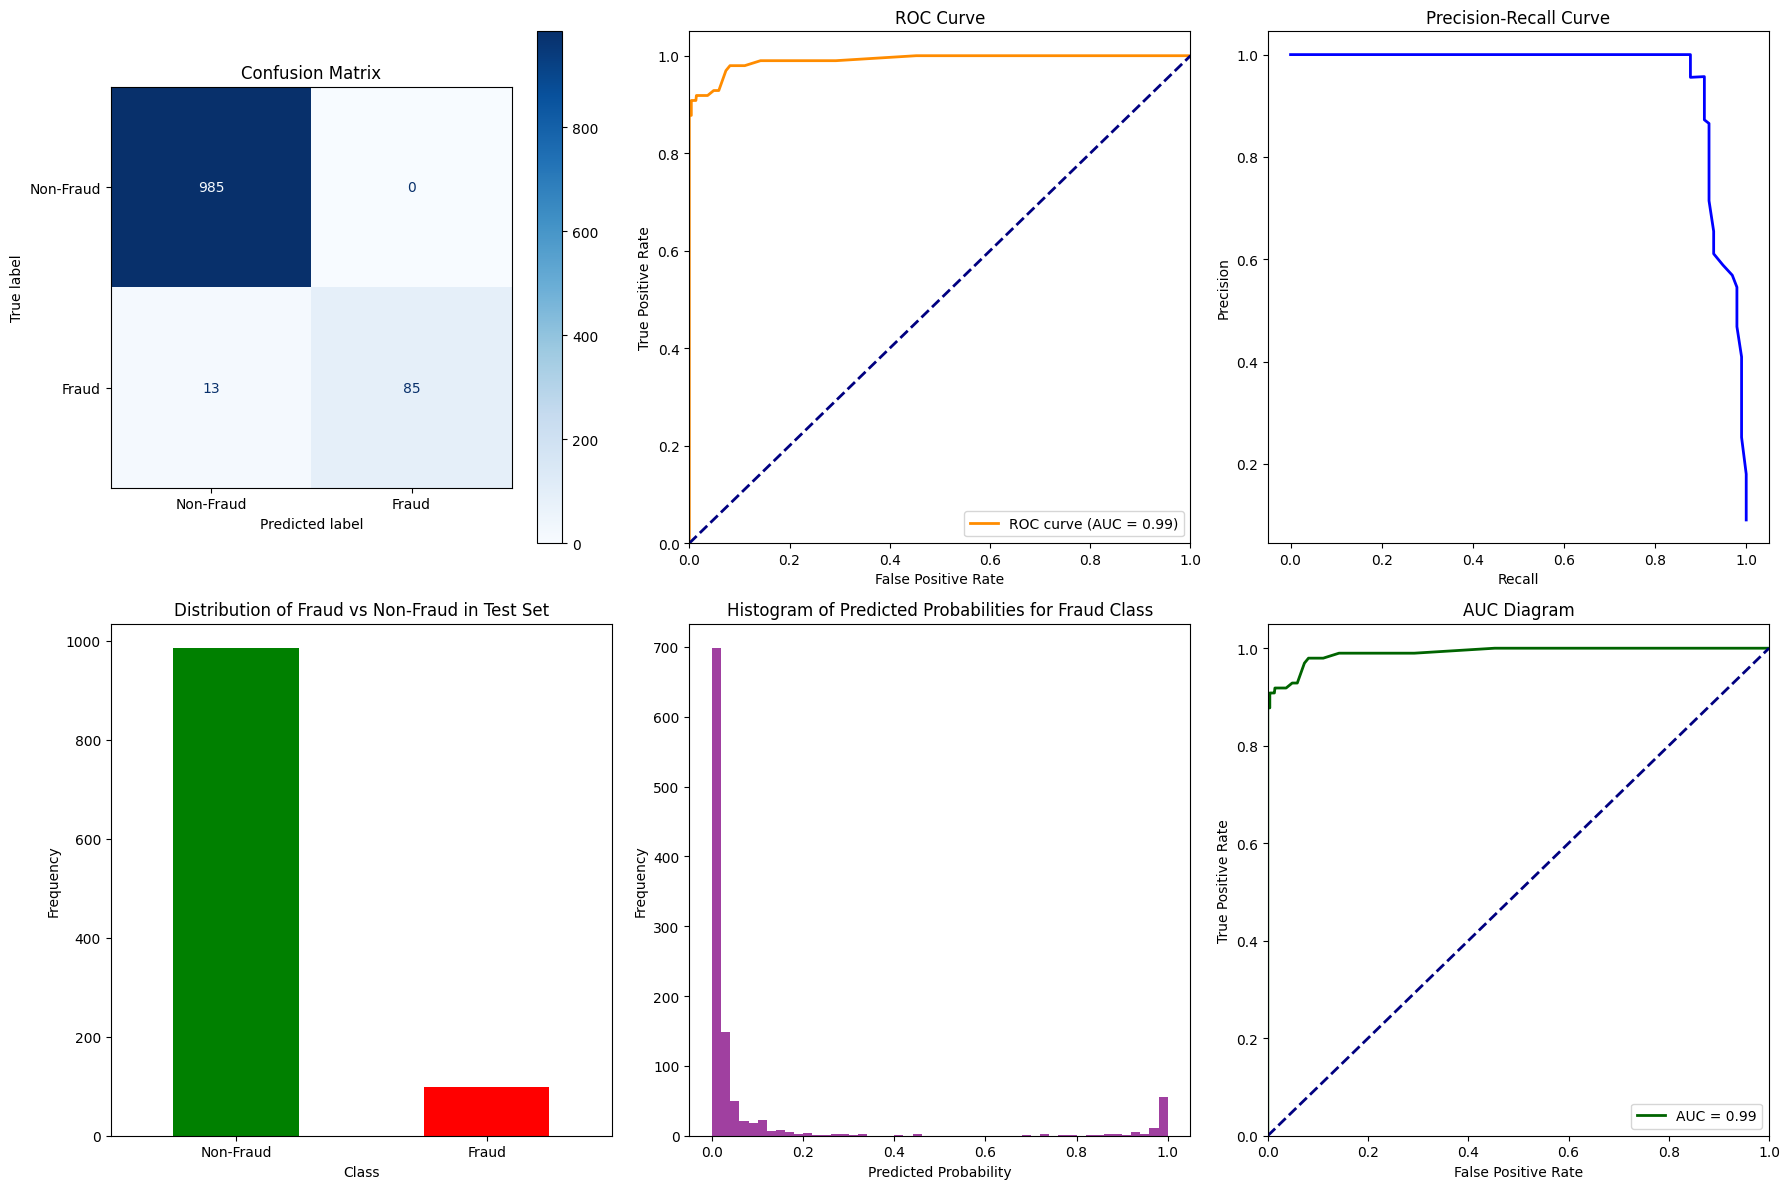

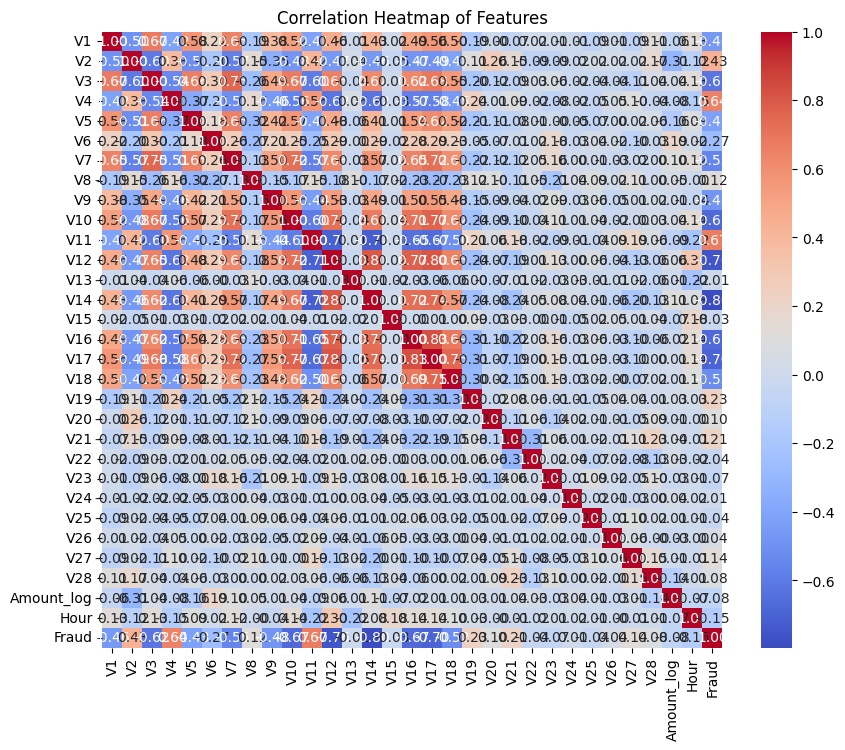

In [6]:
# Step 4.1 Model Selection and Evaluation with RandomForest by class 1 weight and threshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import psutil
import joblib
import os, time
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import sys

# ---------------------------------------------------------------------------------------------
# Step 0: Set affinity to limit CPU usage to avoid overheating 
num_cores = psutil.cpu_count(logical=False)  # Total physical cores
p = psutil.Process()
available_cores = list(range(num_cores // 2))  # Limit to 50% of physical cores
n_jobs = max(1, num_cores // 2)  # Limit to 50% of physical cores
p.cpu_affinity(available_cores)  # Set affinity to limit CPU usage

print(f"Total available physical CPU cores: {num_cores}")
print(f"Using {n_jobs} cores for training.")

# ---------------------------------------------------------------------------------------------
# Step 1: Preparing 
# Step 1.1: fix the random states and ensure directories
np.random.seed(42)
random.seed(42)

# Ensure directories for saving models and plots exist
os.makedirs('models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

# Step 1.2: Parameter Setting
non_fraud_to_fraud_sample_ratio = 10 # Downsampling the dataset to a 10:1 ratio (non-fraud : fraud)
test_size = 0.2 # Set the test size to split the sample data for training and test
k_folds = 5  # Set the number of folds for cross-validation
split_ratio = 0.8  # 80% training, 20% testing for each fold for cross-validation

# Lists of class weights and thresholds to iterate over
thresholds_range = np.round(np.arange(0.495, 0.5051, 0.005), 3) # 3 loops
thresholds_list = list(thresholds_range)

class_weights_range = np.round(np.arange(1.01, 2.111, 0.01), 3) # 50 loops
class_weights_list = list(class_weights_range)  # test for 210 loops

# ---------------------------------------------------------------------------------------------
# Step 2: Load Data 
df = pd.read_csv('./data/creditcard.csv')

# ---------------------------------------------------------------------------------------------
# Step 3: Preprocessing Data ---
df['Amount_log'] = np.log(df['Amount'] + 1e-5)  # Log transform of 'Amount' feature
df['Hour'] = pd.to_datetime(df['Time'], unit='s').dt.hour  # Extract hour part from datetime

# --- Downsampling the dataset to a 2:1 ratio (non-fraud : fraud) ---
fraud_cases = df[df['Class'] == 1]
non_fraud_cases = df[df['Class'] == 0]
n_fraud_cases = len(fraud_cases)
n_non_fraud_sample = n_fraud_cases * non_fraud_to_fraud_sample_ratio
non_fraud_cases_sampled = non_fraud_cases.sample(n=n_non_fraud_sample, random_state=42)

balanced_df = pd.concat([fraud_cases, non_fraud_cases_sampled])
balanced_df = shuffle(balanced_df, random_state=42)

X_balanced = balanced_df.drop(columns=['Class', 'Time', 'Amount'])
y_balanced = balanced_df['Class']

# ---------------------------------------------------------------------------------------------
# Step 4: Splitting and scaling data ---
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=test_size, random_state=42, stratify=y_balanced)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------------------------------------------------------------------------
# Step 5: RandomForest model training, cross-validation, and best model selection
best_f1_fraud = -1  # Initialize to a very low value to track the best F1 score for Fraud
best_model = None
best_conf_matrix = None
best_class_report = None
best_weight_class = None
best_threshold = None

# Initialize StratifiedKFold for cross-validation
cv = StratifiedShuffleSplit(n_splits=k_folds, test_size=1-split_ratio, random_state=42)

# Display the start time before the progress bar starts
overall_start_time = time.time()
print(f"\nOverall Model Training and Tuning Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_start_time))}")

# Initialize progress bar for the combined loop of class weights and thresholds
total_iterations = len(class_weights_list) * len(thresholds_list) * k_folds
pbar = tqdm(total=total_iterations, desc="Model Training Progress", ncols=100)

y_train_np = y_train.to_numpy()  # Convert to numpy array if y_train is a pandas Series
idx = 0

best_weight_class = 0
best_threshold = 0

best_f1_fraud = 0
best_precision = 0
best_recall = 0
best_model = None

# Grid search over class weights and thresholds with cross-validation
for class_weight in class_weights_list:
    for threshold in thresholds_list:
        fold_results = {
            'class_weight': class_weight,
            'threshold': threshold,
            'roc_auc': [],
            'precision_fraud': [],
            'recall_fraud': [],
            'f1_fraud': [],
        }

        avg_f1_fraud = 0
        fold_last_model = None
        
        for train_index, val_index in cv.split(X_train_scaled, y_train_np):
            idx += 1
            pbar.set_description(f"Trying {idx}/{total_iterations}, class_weight={class_weight}, threshold={threshold}")

            X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
            y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

            # Define parameters for RandomForestClassifier
            clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: class_weight}, n_jobs=n_jobs)

            # Train the model
            clf.fit(X_train_fold, y_train_fold)

            # Predict probabilities on the validation fold
            y_val_probs = clf.predict_proba(X_val_fold)[:, 1]  # Get probabilities for class 1 (fraud)

            # Apply the threshold to classify
            y_val_pred = (y_val_probs >= threshold).astype(int)

            # Calculate metrics: ROC-AUC, accuracy, precision, recall, F1-score
            roc_auc = roc_auc_score(y_val_fold, y_val_pred)
            report_dict = classification_report(y_val_fold, y_val_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
            precision_fraud = report_dict['Fraud']['precision']
            recall_fraud = report_dict['Fraud']['recall']
            f1_fraud = report_dict['Fraud']['f1-score']

            # Track metrics for this fold
            fold_results['roc_auc'].append(roc_auc)
            fold_results['precision_fraud'].append(precision_fraud)
            fold_results['recall_fraud'].append(recall_fraud)
            fold_results['f1_fraud'].append(f1_fraud)

            fold_last_model = clf

            clf = None
        
            # Update progress bar
            pbar.update(1)
            
        # Calculate average metrics across folds
        avg_f1_fraud = np.mean(fold_results['f1_fraud'])
        avg_roc_auc = np.mean(fold_results['roc_auc'])
        avg_precision_fraud = np.mean(fold_results['precision_fraud'])
        avg_recall_fraud = np.mean(fold_results['recall_fraud'])

        # Track the best model based on F1-Score of Fraud
        #if avg_f1_fraud >= min_f1_score and avg_recall_fraud >= min_recall and avg_f1_fraud > best_f1_fraud:
        if avg_f1_fraud > best_f1_fraud:
            best_f1_fraud = avg_f1_fraud
            best_precision = avg_precision_fraud
            best_recall = avg_recall_fraud
            best_model = fold_last_model
            best_weight_class = class_weight
            best_threshold = threshold
        
        fold_results = None  # Clear fold results
        
        
# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall  Model Training and Tuning End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - overall_start_time
print(f"Overall training Duration: {int(overall_duration // 3600)} hours and {int((overall_duration%3600) // 60)} minutes and {int(overall_duration % 60)} seconds")

# Display selected best model's performance if found
print(f"\nBest RandomForest Model is with Class Weight = {best_weight_class} and Threshold = {best_threshold}")
print(f"Best F1-score (Fraud) from Cross-Validation: {best_f1_fraud:.2f}")
print(f"Best Precision (Fraud) from Cross-Validation: {best_precision:.2f}")
print(f"Best Recall (Fraud) from Cross-Validation: {best_recall:.2f}")

# Save the best model
joblib.dump(best_model, './models/credit-card-fraud-detection-randomforest.pkl')
print("Best model saved to './models/credit-card-fraud-detection-randomforest.pkl'")

# ---------------------------------------------------------------------------------------------
# Step 6: Final Model Evaluationon Test Set (after tuning)
print("\nEvaluating the best model on the test set...")

# Predict probabilities on the original test set
y_pred_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Apply the best threshold to classify
y_pred_classes = (y_pred_probs >= best_threshold).astype("int32")

# ---------------------------------------------------------------------------------------------
# Step 7: Display Results
final_report = classification_report(y_test, y_pred_classes, output_dict=True)
final_f1_score = final_report['1']['f1-score']
final_precision = final_report['1']['precision']
final_recall = final_report['1']['recall']
roc_auc = roc_auc_score(y_test, y_pred_probs)

print(f"\nFinal F1-score (Fraud) from Test data: {final_f1_score:.2f}")
print(f"Final Precision (Fraud) from Test data: {final_precision:.2f}")
print(f"Final Recall (Fraud) from Test data: {final_recall:.2f}")
print(f"Final Model ROC-AUC Score from Test data: {roc_auc:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('\nFinal Confusion matrix from Test data:\n', conf_matrix)
print("\nFinal Model Classification Report from Test data:\n", classification_report(y_test, y_pred_classes, target_names=['Non-Fraud', 'Fraud'], zero_division=0))

# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------
# Step 8: Plot Diagrams 
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.title(title)
    plt.show()
    
def plot_results(y_test, y_pred_probs, y_pred_classes, conf_matrix, X_test_scaled, X):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2x3 grid for the first six plots

    # 1. Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Fraud', 'Fraud'])
    disp.plot(cmap=plt.cm.Blues, ax=axes[0, 0], values_format='d')
    axes[0, 0].set_title('Confusion Matrix')

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0, 1].set_xlim([0.0, 1.0])
    axes[0, 1].set_ylim([0.0, 1.05])
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curve')
    axes[0, 1].legend(loc="lower right")

    # 3. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
    axes[0, 2].plot(recall, precision, lw=2, color='blue')
    axes[0, 2].set_xlabel('Recall')
    axes[0, 2].set_ylabel('Precision')
    axes[0, 2].set_title('Precision-Recall Curve')

    # 4. Distribution of Fraud vs Non-Fraud in Test Set
    y_test.value_counts().plot(kind='bar', color=['green', 'red'], ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Fraud vs Non-Fraud in Test Set')
    axes[1, 0].set_xlabel('Class')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_xticks([0, 1])
    axes[1, 0].set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

    # 5. Histogram of Predicted Probabilities for Fraud Class
    axes[1, 1].hist(y_pred_probs, bins=50, color='purple', alpha=0.75)
    axes[1, 1].set_title('Histogram of Predicted Probabilities for Fraud Class')
    axes[1, 1].set_xlabel('Predicted Probability')
    axes[1, 1].set_ylabel('Frequency')

    # 6. AUC Plot
    axes[1, 2].plot(fpr, tpr, color='darkgreen', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[1, 2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1, 2].set_xlim([0.0, 1.0])
    axes[1, 2].set_ylim([0.0, 1.05])
    axes[1, 2].set_xlabel('False Positive Rate')
    axes[1, 2].set_ylabel('True Positive Rate')
    axes[1, 2].set_title('AUC Diagram')
    axes[1, 2].legend(loc="lower right")

    # Adjust layout to avoid overlaps and add more space between rows
    plt.tight_layout()

    # Save the first set of diagrams
    plt.savefig('./plots/performance-diagrams.png', bbox_inches='tight')

    # 7. Correlation Heatmap of Features (for Test Set) in a separate row
    X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
    X_test_df['Fraud'] = y_test.values
    plt.figure(figsize=(10, 8))
    sns.heatmap(X_test_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Features')

    # Save the Correlation Heatmap to a file
    plt.savefig('./plots/Correlation-Heatmap-of-Features.png', bbox_inches='tight')
    plt.show()

plot_results(y_test, y_pred_probs, y_pred_classes, conf_matrix, X_test_scaled, X_balanced)


#### RandomForest Model Results: Review and Analysis

##### Model Performance Summary:
The RandomForest model was trained and evaluated for **credit card fraud detection** with the following key results:

- **Training Duration**: The model training and tuning process completed in approximately 5 minutes and 34 seconds, utilizing 12 CPU cores for the computation.
- **Cross-Validation Results**:
  - **Best Class Weight**: 1.07
  - **Best Threshold**: 0.495
  - **Best F1-Score (Fraud)**: 0.90
  - **Best Precision (Fraud)**: 0.99
  - **Best Recall (Fraud)**: 0.82
  
The model selected based on cross-validation was saved as `credit-card-fraud-detection-randomforest.pkl` for further evaluation.

##### Test Set Evaluation:
Upon evaluating the best model on the test data, we observed the following performance metrics:

- **F1-Score (Fraud)**: 0.93
- **Precision (Fraud)**: 1.00
- **Recall (Fraud)**: 0.87
- **ROC-AUC Score**: 0.99

##### Confusion Matrix:
|                | Predicted Non-Fraud | Predicted Fraud |
|----------------|---------------------|-----------------|
| **Actual Non-Fraud** | 985                 | 0               |
| **Actual Fraud**     | 13                  | 85              |

##### Classification Report:
| Class      | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| Non-Fraud  | 0.99      | 1.00   | 0.99     | 985     |
| Fraud      | 1.00      | 0.87   | 0.93     | 98      |

- **Accuracy**: 0.99
- **Macro Avg**:
  - Precision: 0.99
  - Recall: 0.93
  - F1-Score: 0.96
- **Weighted Avg**:
  - Precision: 0.99
  - Recall: 0.99
  - F1-Score: 0.99

##### Analysis:
- **Precision**: The model exhibits **excellent precision for both fraud (1.00)** and non-fraud (0.99) cases, meaning that false positives (incorrectly identifying a non-fraud transaction as fraud) are almost nonexistent.
- **Recall**: While the **recall for fraud cases is 0.87**, indicating that 87% of the actual fraudulent cases were correctly identified, the remaining 13% were missed. This highlights a slight limitation in detecting all fraudulent cases, despite the high precision.
- **F1-Score**: The overall **F1-Score of 0.93 for fraud cases** represents a strong balance between precision and recall, showing that the model performs well in distinguishing fraud from non-fraud cases.
- **Confusion Matrix**: The confusion matrix reveals that the model **did not misclassify any non-fraud cases** as fraud, which is critical in avoiding disruptions to legitimate transactions. However, 13 actual fraud cases were classified as non-fraud, which impacts the recall.

##### Conclusion:
The RandomForest model demonstrates high accuracy and precision, especially in minimizing false positives. The recall rate for fraud detection could be improved, but the model performs exceptionally well overall, achieving an ROC-AUC score of **0.99**, which indicates that the model effectively discriminates between fraud and non-fraud transactions. The trade-off between precision and recall is balanced, making this model a strong candidate for credit card fraud detection with minimal disruption to legitimate transactions.



&nbsp;